# Project 2 - Using Feed-Forward Neural Networks for linear regression and classification
## **Part d)** - Classification analysis with Logistic regression
#### Program imports and defaults

In [1]:
from networkClasses import *
from classSupport import *
from methodSupport import *

import autograd.numpy as anp
from autograd import grad,elementwise_grad
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import roc_curve,roc_auc_score,auc, confusion_matrix

import pandas as pd

## Random seed
def_seed = 1
np.random.seed(def_seed); anp.random.seed(def_seed)

## Figure defaults
plt.rcParams["figure.figsize"] = (8,3); plt.rcParams["font.size"] = 10

### Wisconsin Breast Cancer Dataset and Stochastic Gradient Descent
#### Data preprocessing

In [2]:
anp.random.seed(def_seed)

cancer =  load_breast_cancer() #load_iris()
cancerpd = pd.DataFrame(cancer.data, columns=cancer.feature_names)

inputs = cancer.data; targets = cancer.target

'''
targets = np.zeros((len(inputs), len(cancer.target_names)))
for i, t in enumerate(cancer.target):
    targets[i, t] = 1
    '''
print('Target matrix shape:',targets.shape)
print('Input data shape:',inputs.shape)
print('Target names:',cancer.target_names)

## Train-test splitting
test_size = 1/8
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs,targets,
                                                        test_size=test_size,random_state=def_seed)
#inputs_train, inputs_test, targets_train, targets_test = inputs,inputs,targets,targets

## Data scaling
scaler = StandardScaler()
scaler.fit(inputs_train)
inputs_train_s = scaler.transform(inputs_train)
inputs_test_s = scaler.transform(inputs_test)

Target matrix shape: (569,)
Input data shape: (569, 30)
Target names: ['malignant' 'benign']


##

ROC-AUC: 0.990803
Prediction accuracy: 0.916667
ROC-AUC 0.9908026755852842


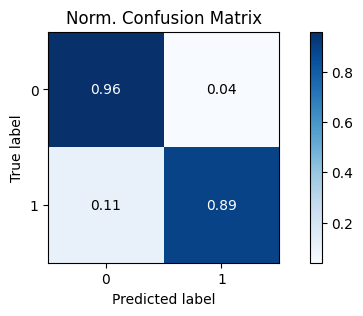

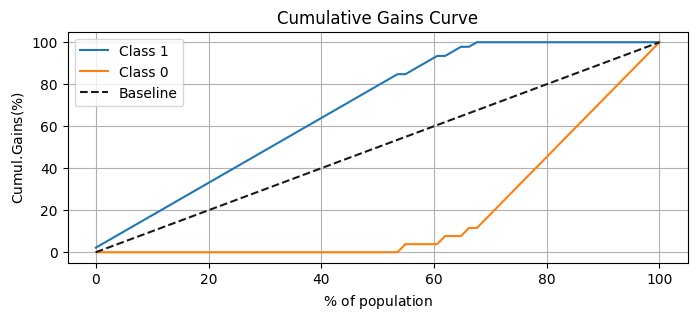

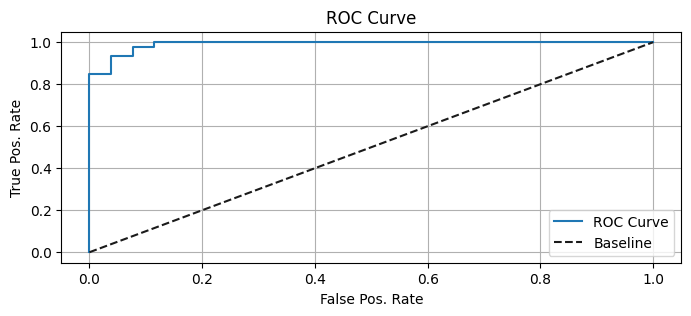

In [3]:
anp.random.seed(def_seed)

## Regression setup and initialization
eta = 0.01; n_iter = 1000; lmbda = 0.0001; gamma = 0.01
adagrad_gamma = 0.1; rms_decay = 0.5; adam_decay = [0.9,0.99]

batches = 10; epoch = 10
cost_func = sigmoid


log_gd = LogisticRegressor(cost_function=cost_func,
                           learning_rate=eta,num_iterations=n_iter,random_state=def_seed)
log_gd.reset()

#GDMethod = PlainGD(learning_rate=eta,lmbda=lmbda,lp=2)
#GDMethod = MomentumGD(eta,momentum=gamma,lmbda=lmbda,lp=2)
#GDMethod = Adagrad(eta,adagrad_gamma,lmbda=lmbda,lp=2)
#GDMethod = RMSprop(eta,rms_decay)
GDMethod = ADAM(eta)

log_gd.gd_fit(inputs_train_s,targets_train,GDMethod=GDMethod,batches=batches,epoch=epoch)
final_prediction_bin = log_gd.predict(inputs_test_s,binary=True)
final_prediction = log_gd.predict(inputs_test_s,binary=False)

## Plots of measures
confusion_roc_cumul_gains(target=targets_test,probabilities=final_prediction)
acc = log_gd.accuracy(final_prediction_bin,targets=targets_test)
print('Prediction accuracy: %g' %acc)
print('ROC-AUC',roc_auc_score(targets_test,final_prediction))

#### Same run with different input parameters for the GD-method

ROC-AUC: 1
Prediction accuracy: 1


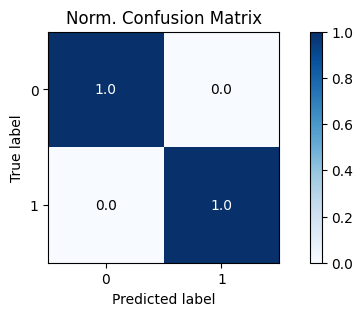

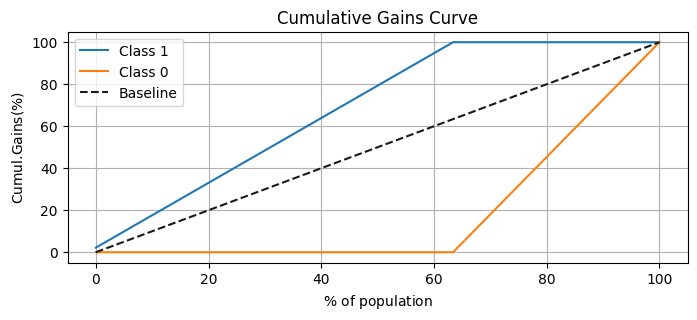

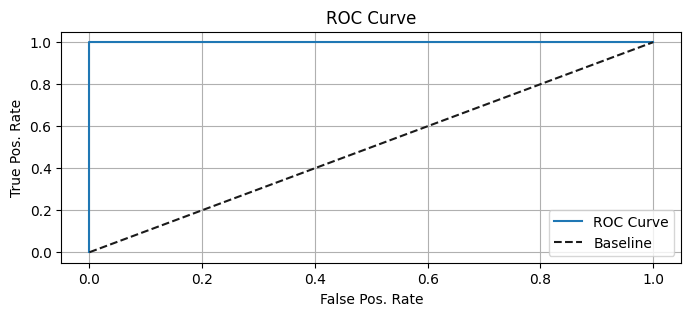

In [4]:
anp.random.seed(def_seed)

## Regression setup and initialization
eta = 0.1; n_iter = 1000; lmbda = 0.0001; gamma = 0.01
adagrad_gamma = 0.1; rms_decay = 0.5; adam_decay = [0.9,0.99]

batches = 10; epoch = 1000
cost_func = sigmoid


log_gd = LogisticRegressor(cost_function=cost_func,
                           learning_rate=eta,num_iterations=n_iter,random_state=def_seed)
log_gd.reset()

#GDMethod = PlainGD(learning_rate=eta,lmbda=lmbda,lp=2)
#GDMethod = MomentumGD(eta,momentum=gamma,lmbda=lmbda,lp=2)
#GDMethod = Adagrad(eta,adagrad_gamma,lmbda=lmbda,lp=2)
#GDMethod = RMSprop(eta,rms_decay)
GDMethod = ADAM(eta)

log_gd.gd_fit(inputs_train_s,targets_train,GDMethod=GDMethod,batches=batches,epoch=epoch)
final_prediction_bin = log_gd.predict(inputs_test_s,binary=True)
final_prediction = log_gd.predict(inputs_test_s,binary=False)
#print(final_prediction.shape)
#print(targets_test)
#print(final_prediction)

confusion_roc_cumul_gains(target=targets_test,probabilities=final_prediction)
acc = log_gd.accuracy(final_prediction_bin,targets=targets_test)
print('Prediction accuracy: %g' %acc)

### Comparison with scikit-learn's Neural network implementation, using the `SGDClassifier`-class

Training iterations: 9
Accuracy, test: 0.9861111111111112
Accuracy, training: 0.9617706237424547
ROC-AUC: 0.98913


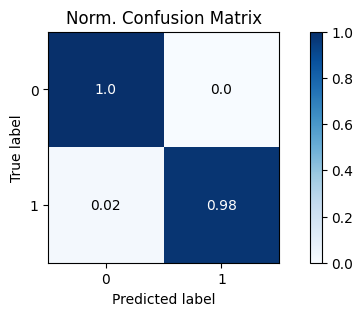

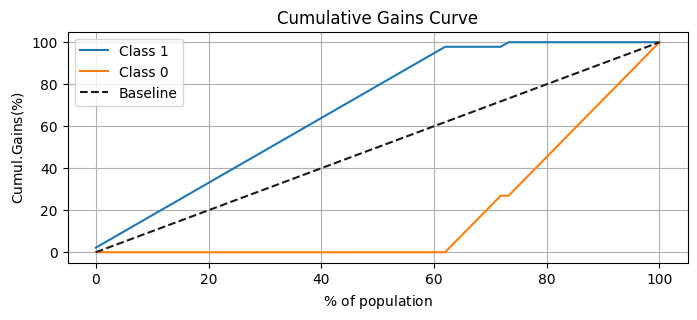

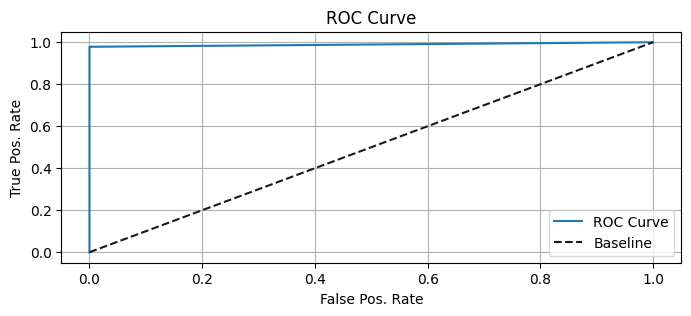

In [5]:
from sklearn.linear_model import SGDClassifier

regressor = SGDClassifier('log_loss',alpha=0.000001
                          ,eta0=.001,
                          max_iter=2000,
                          random_state=def_seed)

regressor.fit(inputs_train_s,targets_train)
final_pred = regressor.predict(inputs_test_s)

print('Training iterations:',regressor.n_iter_)
print('Accuracy, test:',regressor.score(inputs_test_s,targets_test))
print('Accuracy, training:',regressor.score(inputs_train_s,targets_train))

ax = confusion_roc_cumul_gains(targets_test,final_pred)